In [8]:
using BeamLib
using Unitful
import Unitful: mm, cm, m, GHz, dB
import UnitfulAngles: °
pa = BeamLib.PhasedArray2D([(-2cm, -2cm),(-2cm, 2cm),(2cm, -2cm),(2cm, 2cm)])
weights = BeamLib.dsb_weights(pa, 3.75GHz, 90, 90°)
faxis = LinRange(3.7GHz, 3.8GHz, 1024)

1024-element LinRange{Quantity{Float64, 𝐓^-1, Unitful.FreeUnits{(GHz,), 𝐓^-1, nothing}}, Int64}:
 3.7 GHz, 3.7001 GHz, 3.7002 GHz, …, 3.7998 GHz, 3.7999 GHz, 3.8 GHz

In [ ]:
ϕaxis = LinRange(0°, 180°, 256)
θaxis = LinRange(0°, 360°, 256)
W = Ref(weights').*BeamLib.steerphi.(Ref(pa), faxis, 90, θaxis')
WdB = dB.(abs.(W),1, true)

using Plots
import Measures
p1 = heatmap(uconvert.(°, θaxis), uconvert.(GHz, faxis), uconvert.(dB, WdB), cmap = :jet, clim=(-40, 0))
plot!(title="Beampattern\nDelay-and-Sum Beamformer", cbar_title="\nPower in dB", margin=5*Measures.mm)
xlabel!("Angle in degree")
ylabel!("Frequency in GHz")

DimensionMismatch: DimensionMismatch: arrays could not be broadcast to a common size: a has axes Base.OneTo(1024) and b has axes Base.OneTo(256)

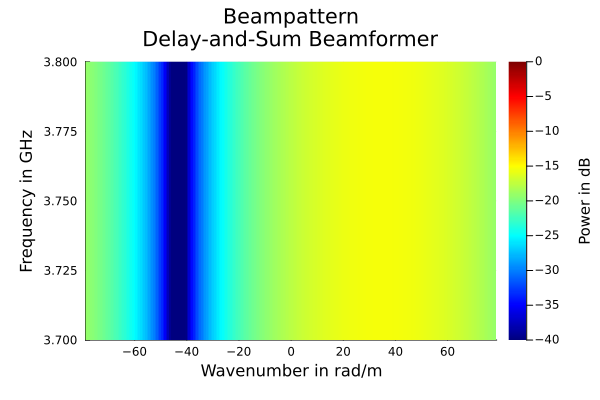

In [3]:
kxaxis = LinRange(-π/4cm, π/4cm, 256)
kyaxis = LinRange(-π/4cm, π/4cm, 256) # Nyquist theorem with k_s = 2π/4cm and k_s/2 = π/4cm
W = Ref(weights').*BeamLib.steerk.(Ref(pa), faxis, kxaxis', kyaxis[128])
WdB = dB.(abs.(W),1, true)

using Plots
import Measures
p1 = heatmap(uconvert.(m^-1, kxaxis), uconvert.(GHz, faxis), uconvert.(dB, WdB), cmap = :jet, clim=(-40, 0))
plot!(title="Beampattern\nDelay-and-Sum Beamformer", cbar_title="\nPower in dB", margin=5*Measures.mm)
xlabel!("Wavenumber in rad/m")
ylabel!("Frequency in GHz")

Note how the beampattern is not pinched/stretched for changing frequencies when plotted over a wavenumber axis. 